In [26]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [27]:
df = pd.read_csv("library_3366rows.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'library_3366rows.csv'

In [ ]:
df.describe()

In [ ]:
df = df.select_dtypes(include=np.number)
df

In [25]:
duplicateRows = df[df.duplicated()]
duplicateRows

popularity  danceability  energy  key  loudness  mode  acousticness  \
475           75         0.687   0.793    2    -4.254     1       0.06030   
552           90         0.561   0.520   11    -9.342     0       0.05030   
572          100         0.707   0.681    0    -4.325     1       0.06320   
573           91         0.644   0.735    8    -5.747     1       0.05210   
574           96         0.778   0.632    2    -5.600     0       0.27400   
...          ...           ...     ...  ...       ...   ...           ...   
2202          69         0.607   0.422   10   -13.364     0       0.20900   
2207          69         0.669   0.821   11    -4.370     0       0.00182   
3086          87         0.743   0.865    6    -3.897     1       0.44900   
3150          80         0.881   0.592    2    -4.898     1       0.61900   
3359          59         0.596   0.915    4    -4.711     1       0.09490   

      instrumentalness  liveness  valence    tempo  duration_ms  \
475           0.000000    0.5820    0.751  107.045       205733   
552           0.000002    0.3550    0.424  153.150       239360   
572           0.000005    0.0322    0.646  117.999       200455   
573           0.144000    0.1610    0.418   88.980       153947   
574           0.000000    0.0915    0.498  122.104       218289   
...                ...       ...      ...      ...          ...   
2202          0.000000    0.0839    0.563  130.470       226987   
2207          0.000000    0.1470    0.684   94.895       237573   
3086          0.000003    0.2970    0.794  129.999       166775   
3150          0.000013    0.0901    0.719  101.058       154487   
3359          0.000002    0.1200    0.629  120.024       224908   

      time_signature  
475                4  
552                3  
572                4  
573                4  
574                4  
...              ...  
2202               3  
2207               4  
3086               4  
3150               4  
3359               4  

[352 rows x 13 columns]

In [17]:
scaler = StandardScaler()
scaler.fit(df)
X_scaled = scaler.transform(df)
X_scaled_df = pd.DataFrame(X_scaled, columns = df.columns)
display(df.head())
print()
display(X_scaled_df.head())

popularity  danceability  energy  key  loudness  mode  acousticness  \
0          62         0.711   0.838    2    -7.985     1       0.29200   
1          49         0.746   0.749   11   -10.482     0       0.00567   
2          17         0.544   0.872    5    -7.444     0       0.00794   
3          27         0.753   0.915    4    -8.609     0       0.00104   
4          31         0.685   0.810    2    -8.179     1       0.00020   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0             0.927    0.1460   0.2230  124.002       224274               4  
1             0.366    0.2280   0.0342  123.988       178064               4  
2             0.877    0.1180   0.1820  123.033       265366               4  
3             0.883    0.0608   0.1040  120.008       233662               4  
4             0.899    0.0900   0.0869  123.994       435322               4

popularity  danceability    energy       key  loudness      mode  \
0   -0.033294      0.544968  0.971287 -0.911740  0.262097  0.794238   
1   -0.732364      0.759781  0.658845  1.576346 -0.083673 -1.259068   
2   -2.453153     -0.479994  1.090647 -0.082378  0.337012 -1.259068   
3   -1.915407      0.802743  1.241603 -0.358832  0.175689 -1.259068   
4   -1.700308      0.385393  0.872991 -0.911740  0.235233  0.794238   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0     -0.132027          1.736213 -0.188438 -0.875495  0.173282     0.292176   
1     -0.914680          0.301948  0.397645 -1.619007  0.172799    -0.428478   
2     -0.908476          1.608382 -0.388565 -1.036956  0.139852     0.933014   
3     -0.927336          1.623722 -0.797394 -1.344128  0.035492     0.438584   
4     -0.929632          1.664628 -0.588691 -1.411469  0.173006     3.583513   

   time_signature  
0        0.233924  
1        0.233924  
2        0.233924  
3        0.233924  
4        0.233924

## Clustering the wines with K-Means

In [19]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=3, random_state=1234)

In [20]:
kmeans.labels_

array([2, 1, 1, ..., 1, 0, 2], dtype=int32)

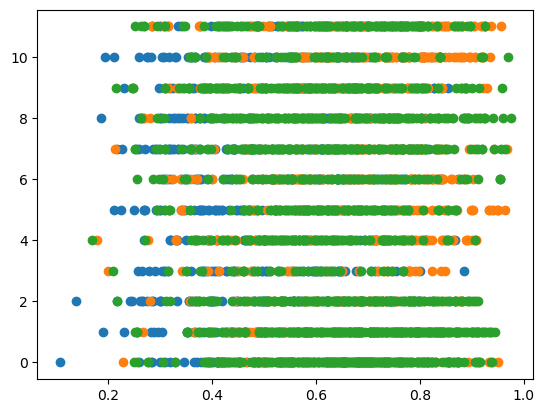

In [21]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df.to_numpy()[row_ix, 1], df.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()